# Pose Estimation from Synthetic Images

In [1]:
import numpy as np
#path_old = "../SuperGluePretrainedNetwork/MoonLu/MoonImg_Out/Nadir_pitch_15_deg_matches.npz"
path = "MoonLu/MoonImg_Out/Nadir_pitch_15_deg_matches.npz"
npz = np.load(path)
#npz.files

una volta presi i vettori di keypoint0 e keypoint1, devo darli in pasto a findEssentialMat() per trovare la matrce essenziale E.
Solo che mi da un errore: OpenCV(4.10.0) D:\bld\libopencv_1726965773712\work\modules\calib3d\src\five-point.cpp:459: error: (-215:Assertion failed) npoints >= 0 && points2.checkVector(2) == npoints && points1.type() == points2.type() in function 'cv::findEssentialMat'
Quindi le strade da percorrere sono due, partendo dal presupposto che il typo di dati in input coincide con quello richiesto dalla funzione:

1- Tagliare semplicemente il vettore di keypoint1 in modo da avere la stessa lunchezza di keypoint0

2- Tagliarlo come in 1., ma riordinarlo anche usando gli indici in "matches"

In [2]:
coord_1 = npz["keypoints0"]
coord_2 = npz["keypoints1"][0:len(coord_1)]
#print((coord_2))
#print(len(coord_1))
#print(coord_2)

f = 6.013/(11.7e-3)
print(f)
c = 1024/2

CameraMat = np.array([
    [f,0,c],
    [0,f,c],
    [0,0,1]
], dtype=np.float32)
#print(type(CameraMat))
#print(npz["matches"])

513.9316239316239


Per ora stiamo lavorando col metodo 1

In [3]:
#from cv2 import findEssentialMat, recoverPose, RANSAC
import cv2

E, mask = cv2.findEssentialMat(coord_1, coord_2, CameraMat, method = cv2.RANSAC, prob = 0.999, threshold = 1.0)
#E, mask = cv2.findEssentialMat(coord_1, coord_2, CameraMat)
print(type(E))

<class 'numpy.ndarray'>


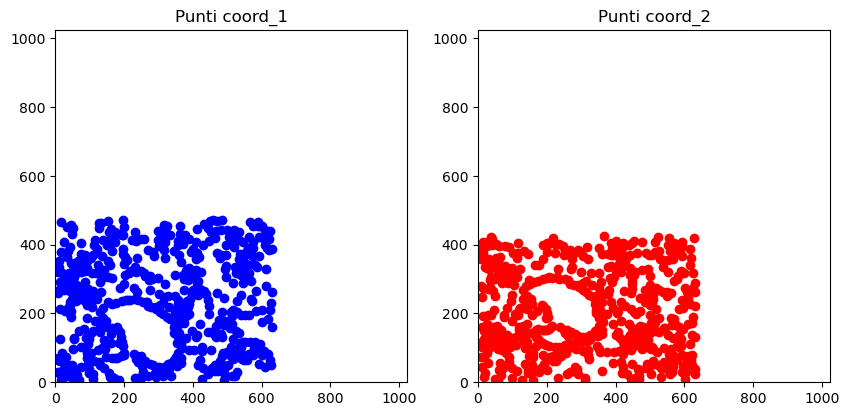

In [4]:
import matplotlib.pyplot as plt

# Visualizza i punti delle due immagini
plt.figure(figsize=(10, 5))

# Visualizza i punti della prima immagine
plt.subplot(1, 2, 1)
plt.scatter(coord_1[:, 0], coord_1[:, 1], color='blue', marker='o')
plt.title('Punti coord_1')
plt.xlim(0, 1024)
plt.ylim(0, 1024)
plt.gca().set_aspect('equal', adjustable='box')

# Visualizza i punti della seconda immagine
plt.subplot(1, 2, 2)
plt.scatter(coord_2[:, 0], coord_2[:, 1], color='red', marker='o')
plt.title('Punti coord_2')
plt.xlim(0, 1024)
plt.ylim(0, 1024)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()




In [5]:
E = E.astype(np.float32)
coord_1 = np.ascontiguousarray(coord_1, dtype=np.float32)
coord_2 = np.ascontiguousarray(coord_2, dtype=np.float32)

#Pose, R, T, mask = cv2.recoverPose(E, coord_1, coord_2, CameraMat)
retval, R, T, mask1 = cv2.recoverPose(E, coord_1, coord_2, CameraMat)


error: OpenCV(4.10.0) D:\bld\libopencv_1726965773712\work\modules\core\src\matmul.dispatch.cpp:356: error: (-215:Assertion failed) type == B.type() in function 'cv::gemm'
